<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span></li><li><span><a href="#Метрики-и-графики" data-toc-modified-id="Метрики-и-графики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Метрики и графики</a></span><ul class="toc-item"><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Продуктовые метрики</a></span></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Маркетинговые метрики</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Источник-трафика" data-toc-modified-id="Источник-трафика-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Источник трафика</a></span></li><li><span><a href="#Метрики" data-toc-modified-id="Метрики-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метрики</a></span></li><li><span><a href="#Итоги-когортного-анализа" data-toc-modified-id="Итоги-когортного-анализа-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Итоги когортного анализа</a></span></li></ul></li></ul></div>

# Маркетинговый анализ Яндекс.Афиши 

В наличии данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Необходимо изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

Цель проекта: определить ключевые источники трафика, на которые маркетологам стоит делать упор; посчитать маркетинговые, продуктовые и метрики электронной коммерции; определить самые перспективные для компании когорты клиентов.

Задача: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

## Изучение и подготовка данных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

server_path_visits = '/datasets/visits_log.csv'
server_path_orders = '/datasets/orders_log.csv'
server_path_costs = '/datasets/costs.csv'

filename_visits = 'visits_log.csv'
filename_orders = 'orders_log.csv'
filename_costs = 'costs.csv'

try: 
    visits = pd.read_csv(server_path_visits, sep=',')
    orders = pd.read_csv(server_path_orders, sep=',')
    costs = pd.read_csv(server_path_costs, sep=',')
except: 
    visits = pd.read_csv(filename_visits, sep=',')
    orders = pd.read_csv(filename_orders, sep=',')
    costs = pd.read_csv(filename_costs, sep=',') 

In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Пропусков не обнаружено. Необходимо откорректировать типы данных в столбцах с датами. Также приведем названия столбцов к единому образцу. 

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%dT%H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [10]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [14]:
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

Дубликатов не обнаружено. Данные готовы к анализу.

## Метрики и графики 

### Продуктовые метрики 

На данном этапе нам необходимо выполнить анализ пользовательской активности: 

- Рассчитать DAU, WAU и MAU;
- Определить, сколько раз за день пользователи в среднем заходят на сайт;
- Исследовать, сколько времени пользователи проводят на сайте. 
- Рассчитать Retention Rate, применяя когортный анализ.

Для расчета пользовательских метрик выделим в отдельные столбцы год, месяц, неделю и дату посещения ресурса.

In [17]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [18]:
visits.head(1)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20


Отобразим изменения метрик во времени на графиках и посчитаем средние значения для каждой из метрик за весь период.

In [19]:
dau = visits.groupby('session_date').agg({'uid':'nunique'})
wau = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
mau = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})

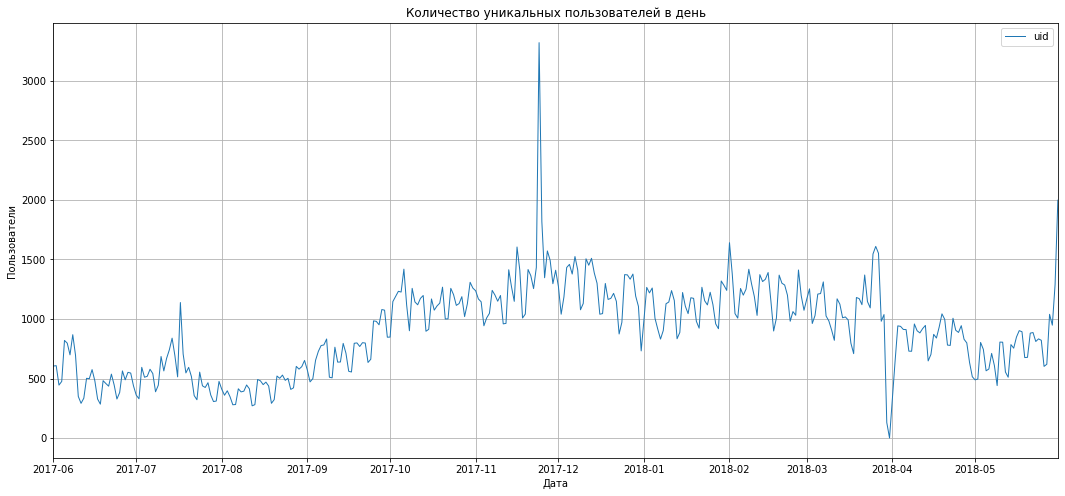

In [20]:
dau.plot(figsize=(18, 8), linewidth=1, grid=True)
plt.title('Количество уникальных пользователей в день')
plt.xlabel('Дата')
plt.ylabel('Пользователи')
plt.show()

In [21]:
dau['uid'].describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: uid, dtype: float64

In [22]:
dau[dau['uid'] > 2000]

,uid
session_date,
2017-11-24,3319


In [23]:
dau[dau['uid'] < 5]

,uid
session_date,
2018-03-31,1


График ежедневной пользовательской активности указывает на то, что посещение сайта имеет нестабильный характер. В один день количество уникальных посещений может насчитывать более 1700 единиц, в следующий - 1000. В среднем, учитывая заданный период, ежедневно на ресурс заходит порядка 920 человек. 

Наблюдаются единичные аномалии. Так, например, 24 ноября 2017 года произошел резкий скачок и количество уникальных посещений превысило отметку в 3300. Возможно, в эту или ближающую дату проходило популярное мероприятие или старт продаж билетов. 

Еще одной аномалией является посещение одним пользователем ресурса 31 марта 2018 года. Это можно объяснить техническим сбоем в работе сервиса.  

В целом, с конца осени 2017 года наблюдается рост среднего количества уникальных посещений в день. Еще в августе число посещений варьировалось от 300 до 500, то уже в ноябре ежедневно на ресурс заходило от 900 до 1500 человек, не учитывая ранее упомянутый выброс. 

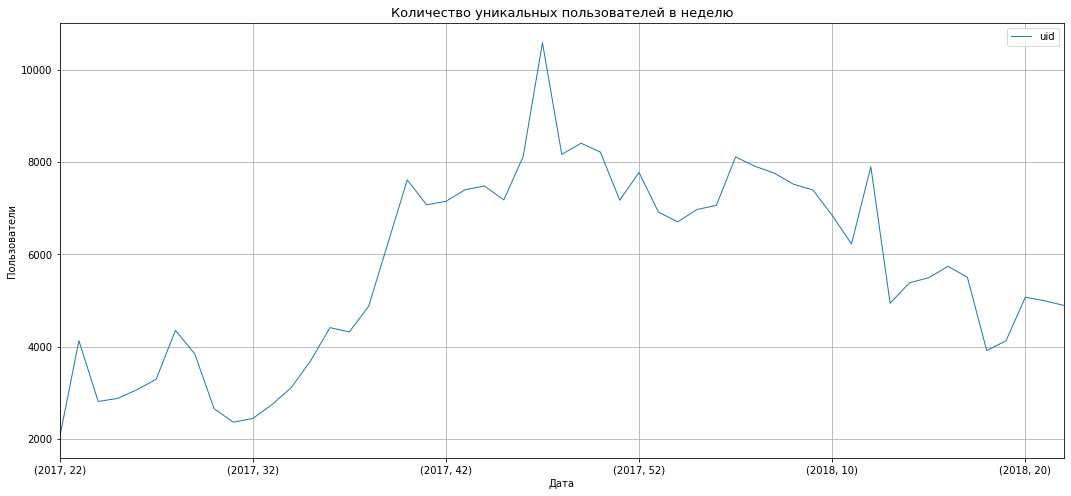

In [24]:
wau.plot(figsize=(18, 8), linewidth=1, grid=True)
plt.title('Количество уникальных пользователей в неделю', fontsize=13)
plt.xlabel('Дата')
plt.ylabel('Пользователи')
plt.show()

График недельной пользовательской активности подтверждает, что в какие-то периоды ресурс более популярен, чем в другие, а также говорит о том, что в конце осени 2017 - в начале зимы 2018 Яндекс.Афиша имела наиболее высокие цифры посещаемости в заданный период. 

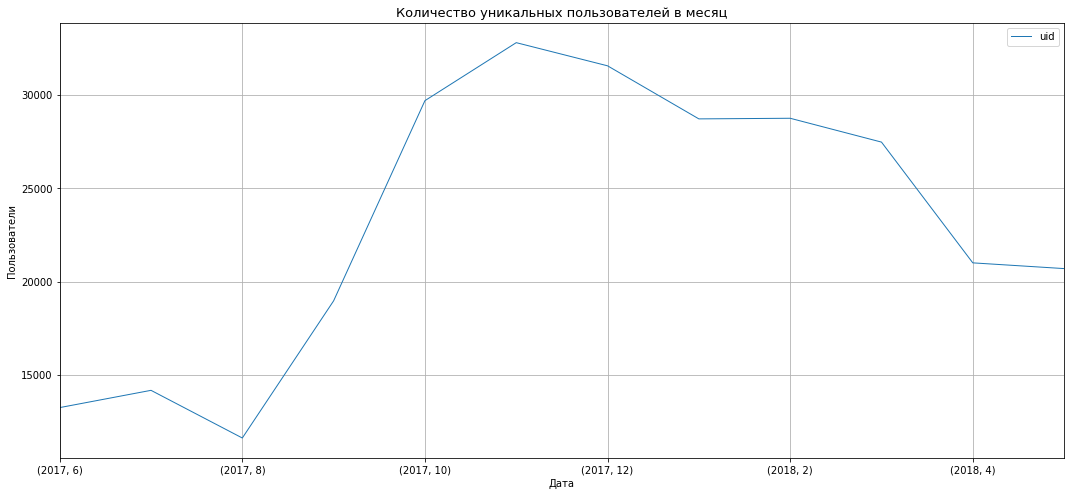

In [25]:
mau.plot(figsize=(18, 8), linewidth=1, grid=True)
plt.title('Количество уникальных пользователей в месяц', fontsize=13)
plt.xlabel('Дата')
plt.ylabel('Пользователи')
plt.show()

График MAU более наглядно показывает, как за три месяца с августа по ноябрь 2017 года аудитория сайта выросла с 12 тысяч уникальных пользователей в месяц до максимальных за выбранный период 34 тысяч. За ноябрьским пиком следует постепенный спад ежемесячной аудитории и к марту 2018 года количество уникальных визитов находится у отметки в 21 тысячу человек.

In [26]:
print('Количество уникальных пользователей в день:', int(dau.mean()))

Количество уникальных пользователей в день: 907


In [27]:
print('Количество уникальных пользователей в неделю:', int(wau.mean()))

Количество уникальных пользователей в неделю: 5716


In [28]:
print('Количество уникальных пользователей в месяц:', int(mau.mean()))

Количество уникальных пользователей в месяц: 23228


Так, в среднем с июня 2017 года по апрель 2018 в день ресурсом пользовалось 907 человек, в неделю - 5716, в месяц - более 23 тысяч человек. 

Теперь посчитаем среднее количество визитов на пользователя в день. 

In [29]:
visits_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
visits_per_user.columns = ['n_visits', 'n_users']
visits_per_user['v_per_user'] = visits_per_user['n_visits'] / visits_per_user['n_users']
visits_per_user.head()

,n_visits,n_users,v_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [30]:
visits_per_user['v_per_user'].mean()

1.082169644003972

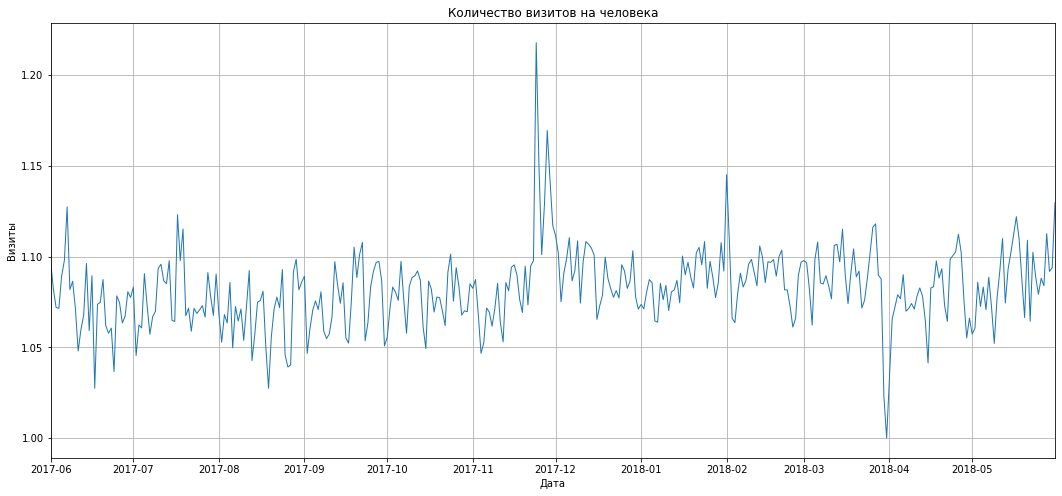

In [31]:
visits_per_user['v_per_user'].plot(figsize=(18, 8), linewidth=1, grid=True)
plt.title('Количество визитов на человека')
plt.xlabel('Дата')
plt.ylabel('Визиты')
plt.show()

In [32]:
visits_per_user[visits_per_user['v_per_user'] > 1.15]

,n_visits,n_users,v_per_user
session_date,,,
2017-11-24,4042,3319,1.217837
2017-11-28,1746,1493,1.169457


Пользователи заходит на сайт Афиши 1 раз, единицы из них - больше. 24 и 28 ноября этот показатель увеличился до 1,21 и 1,16 соответственно. Это также дает возможность предположить, что в ноябре 2018 состоялся старт продаж билетов на какое-то долгожданное многими событие, из-за чего количество визитов в день на человека увеличилось (билетов поступали партиями или запуск продаж был не анонсирован по времени, что заставляло посетителей обновлять страницу несколько раз в ожидании).  

Следующий шаг - анализ ASL. Чтобы выбрать подходящую среднюю меру, построим график распределения. 

In [33]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [34]:
visits['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

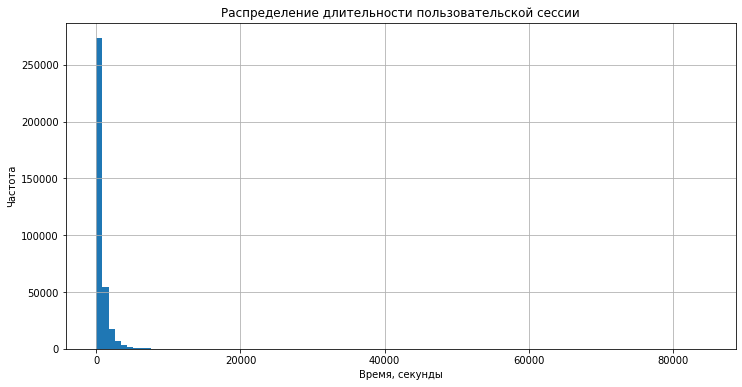

In [35]:
visits['duration'].hist(figsize=(12, 6), bins=100)
plt.title('Распределение длительности пользовательской сессии')
plt.xlabel('Время, секунды')
plt.ylabel('Частота')
plt.show()

Распределение далеко от нормального, поэтому считать среднее или медиану нецелесообразно. Для расчета средней продолжительности сессии на сайте найдем моду - наиболее часто встречающееся значение в массиве.  

In [36]:
visits['duration'].mode()[0]

60

Хотя среднее арифметическое в районе 10 минут, в большинстве случаев пользователь проводит 1 минуту на сайте Яндекс.Афиши. 

Исследуем еще один показатель пользовательской активности на сайте - Retention Rate или коэффициент удержания. Для этого сначала нам необходимо провести когортный анализ. 

In [37]:
first_visit = visits.groupby('uid')[['start_ts']].min()
first_visit.columns = ['first_visit_date']
first_visit.head()

,first_visit_date
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00


In [38]:
visits = visits.join(first_visit, on='uid', how='inner')

In [39]:
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [40]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits.head(1)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration,first_visit_date,visit_month,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0


In [41]:
cohorts_visits = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts_visits.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Выделили когорты по дате первого посещения и времени жизни каждой, посчитали количество активных пользователей по месяцам. 

In [42]:
initial_users_count = cohorts_visits[cohorts_visits['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [43]:
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

In [44]:
cohorts_visits = cohorts_visits.merge(initial_users_count, on='first_visit_month')
cohorts_visits['retention'] = (cohorts_visits['uid'] / cohorts_visits['cohort_users'])
cohorts_visits.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


In [45]:
retention = cohorts_visits.pivot_table(index='first_visit_month', 
                               columns='cohort_lifetime', 
                               values='retention', 
                               aggfunc='sum')
retention.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


Визуализируем пользовательский Retention rate с помощью тепловой карты. 

In [46]:
retention.index = [str(x)[0:10] for x in retention.index]

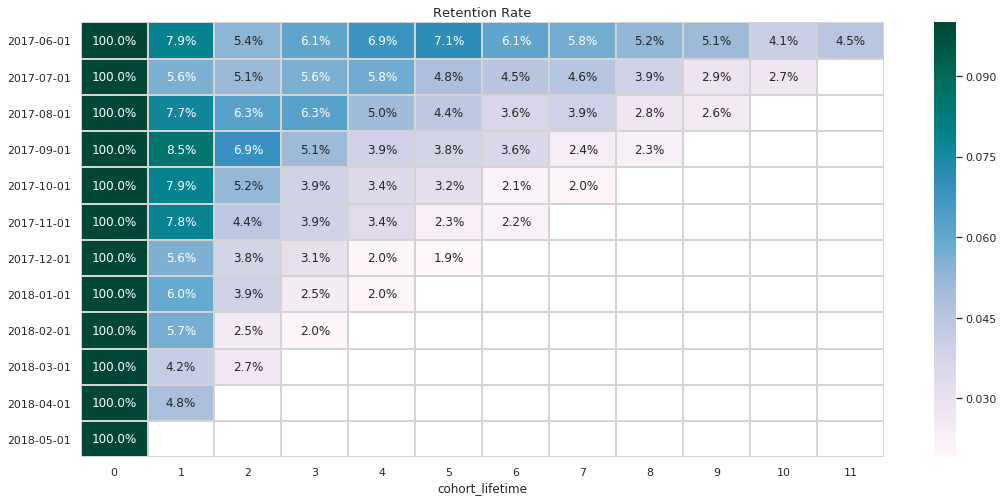

In [47]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('Retention Rate', fontsize=13)
sns.heatmap(retention, annot=True, linewidths=1, fmt='.1%', vmax=0.1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

Посчитаем средний Retention Rate на второй месяц жизни когорт. 

In [48]:
retention[1].mean()

0.06516659710392834

Коэффициент удержания Яндекс.Афиши не очень высок. В среднем, 6,5% посетителей возвращается на сайт на второй месяц пользования ресурсом. Со временем Retention Rate только падает в подавляющем числе когорт, за исключением когорт тех пользователей, что впервые воспользовались Афишей в июне, июле и августе 2017 года.  

Анализ июньской когорты показывает, что Retention Rate падает с 7,9% до 5,4% со второго на третий месяц, однако на шестой практически достигает показателей второго месяца, затем снова падает. 

У июльской когорты немного другая ситуация. Коэффициент удержания сохраняется на отметке выше 5% вплоть до пятого месяца, когда даже на 0,2% пункта превышает показатели второго месяца, а затем уменьшается. 

Когорта сентября 2017 года показывает самые высокие значения RR из всех на второй и третий месяц использования - 8,5% и 6,9% соответственно. Кроме того, стоит отметить, что в когортах помладше Retention Rate на второй месяц ниже, чем у более ранних когорт. 

***Вывод***

Учитывая, что количество уникальных пользователей в среднем в месяц превышает 23 тысячи человек, а коэффициент удержания низкий, можно предположить, что поток новых посетителей высок, но желания постоянно использовать сервис нет.  

Здесь можно указать несколько сценариев, почему так происходит. Во-первых, Афиша - ситуативный ресурс: пользователь может купить один раз в год билет на концерт или матч, не интересоваться театром, а кино смотреть дома. Либо он может периодически переходить на сайт для для покупки билетов в театр и кино. Также он может покупать билеты на официальных сайтах продавцов, а к Афише обращаться исключительно для просмотра предложений (Таких, вероятно, большинство, потому что расчеты выше показывают, что средняя пользовательская сессия длится 1 минуту). Вторые и третьи - пользовательский костяк, который необходимо укреплять с помощью рекламы и бонусов - оставаться в поле зрения и предлагать комфортную систему покупки. 

Таким образом, основная задача - увеличить количество постоянных пользователей, которые будут видеть в Яндекс.Афише удобный и выгодный ресурс. 

### Метрики электронной коммерции 

Теперь посмотрим на пользователей как на покупателей продукта, предлагаемого Яндекс.Афишей. На этом этапе необходимо: 

- Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
- Рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев;
- Рассчитать средний чек; 
- Выяснить, как меняется LTV на покупателя по когортам. Маржинальность сервиса — 100%. 

У нас уже есть необходимые сгруппированные данные о дате первого визита. Создадим таблицу с датой первой покупки.

In [49]:
first_order = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order.columns = ['uid', 'first_order_date']
first_order.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [50]:
visit_to_order = first_order.join(first_visit, on='uid', how='inner')
visit_to_order.head()

,uid,first_order_date,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [51]:
visit_to_order['time_to_order'] = (visit_to_order['first_order_date'] - visit_to_order['first_visit_date']) / np.timedelta64(1, 'm')
visit_to_order['time_to_order'] = visit_to_order['time_to_order'].astype('int')
visit_to_order.head()

,uid,first_order_date,first_visit_date,time_to_order
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [52]:
visit_to_order['time_to_order'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: time_to_order, dtype: float64

Анализ статистических характеристик показывает, что есть пользователи, которые совершили покупку спустя несколько минут после первого посещения сайта, а есть те, кто сделал это спустя дни и месяцы после первого визита. 
Так, медиана находится у отметки в 16 минут, в то время как среднее - более 24 тысяч минут, то есть почти 17 дней. В то же время, квартили показывают, что большинство заказов было сделано в промежутке от 4 минут до 2 дней. 

Максимальное время между первым посещением и заказом практически год - 363 дня. 

Построим гистограмму распределения. 

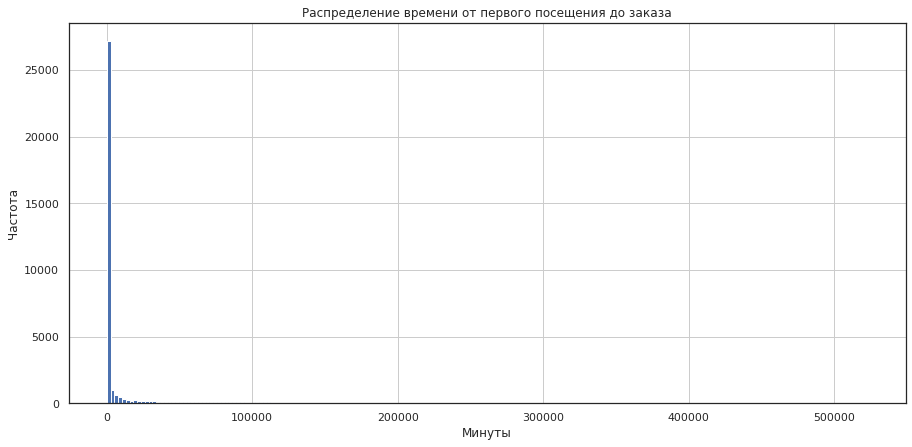

In [53]:
visit_to_order['time_to_order'].hist(figsize=(15, 7), grid=True, bins=200)
plt.title('Распределение времени от первого посещения до заказа')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

Распределение ненормальное, найдем наиболее часто втречаемое значение. 

In [54]:
visit_to_order['time_to_order'].mode()[0]

1

Мода - 1 минута. Посмотрим также на значения среднего и медианы в рамках статистических квартилей без выбросов. 

In [55]:
stat_order = visit_to_order.query('time_to_order >= 4 and time_to_order <= 2897')
stat_order['time_to_order'].describe()

count    18498.000000
mean       224.454373
std        533.234194
min          4.000000
25%          7.000000
50%         16.000000
75%         66.000000
max       2896.000000
Name: time_to_order, dtype: float64

Медиана - 7 минут, среднее - 3 часа 44 минуты. 

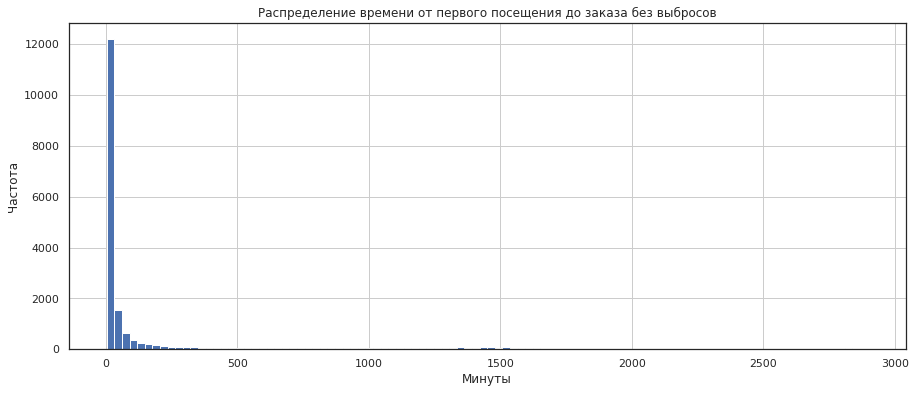

In [56]:
stat_order['time_to_order'].hist(figsize=(15, 6), grid=True, bins=100)
plt.title('Распределение времени от первого посещения до заказа без выбросов')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

Распределение все еще не соответствует нормальному, значит в качестве средней меры будем рассматривать моду. То есть среднее время между первым посещение сайта Яндекс.Афиши и первым заказом составляет 1 минуту. Это можно объяснить тем, что большинство пользователей приходят на сайт по ссылке для заказа (через поисковык или рекламу) и не тратят много времени на поиск необходимых мероприятий. 

Теперь посчитаем среднее количество покупок на одного покупателя за 6 месяцев, используя когортный анализ. 

In [57]:
first_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
uid                 36523 non-null uint64
first_order_date    36523 non-null datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.8 KB


In [58]:
orders_new = orders.merge(first_order, on='uid')
orders_new.head(5)

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [59]:
orders_new['order_month'] = orders_new['buy_ts'].astype('datetime64[M]')
orders_new['first_order_month'] = orders_new['first_order_date'].astype('datetime64[M]')

In [60]:
orders_new['cohort_lifetime'] = orders_new['order_month'] - orders_new['first_order_month']
orders_new['cohort_lifetime'] = orders_new['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_new['cohort_lifetime'] = orders_new['cohort_lifetime'].round().astype('int')
orders_new.head()

,buy_ts,revenue,uid,first_order_date,order_month,first_order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [61]:
cohort_sizes = orders_new.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [62]:
cohorts_orders = orders_new.groupby(['first_order_month', 'order_month']).agg({'buy_ts':'count'}).reset_index()
cohorts_orders.head()

,first_order_month,order_month,buy_ts
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [63]:
orders_per_user = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')
orders_per_user.head()

,first_order_month,n_buyers,order_month,buy_ts
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292


In [64]:
orders_per_user['age'] = (orders_per_user['order_month'] - orders_per_user['first_order_month']) / np.timedelta64(1, 'M')
orders_per_user['age'] = orders_per_user['age'].round().astype('int')
orders_per_user['orders_per_user'] = orders_per_user['buy_ts'] / orders_per_user['n_buyers']

In [65]:
cohorts_age = orders_per_user.pivot_table(index='first_order_month', 
                                          columns='age', 
                                          values='orders_per_user', 
                                          aggfunc='sum').cumsum(axis=1)
cohorts_age.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.25111,1.33712,1.44884,1.59318,1.70094,1.83737,1.92338,2.02818,2.10381,2.15126,2.19377
2017-07-01,1.136765,1.18877,1.25117,1.30525,1.34269,1.38534,1.41706,1.44306,1.47322,1.4857,1.51326,
2017-08-01,1.118978,1.19781,1.2708,1.32993,1.39197,1.43723,1.47299,1.52993,1.5635,1.59708,,
2017-09-01,1.136381,1.22123,1.28361,1.34715,1.37311,1.41534,1.45719,1.47888,1.50252,,,
2017-10-01,1.143779,1.21613,1.25346,1.28157,1.31129,1.33502,1.35484,1.38364,,,,
2017-11-01,1.179368,1.27665,1.32124,1.37295,1.40627,1.42073,1.44572,,,,,
2017-12-01,1.152635,1.21424,1.26032,1.30116,1.32078,1.34474,,,,,,
2018-01-01,1.121554,1.18796,1.2351,1.25408,1.2772,,,,,,,
2018-02-01,1.121611,1.18242,1.20515,1.22432,,,,,,,,


Выведем среднее число покупок.

In [66]:
round(cohorts_age[5].mean(), 2)

1.43

Так, в среднем на пользователя приходится 1,43 заказа. В первый месяц жизни когорты каждый уникальный пользователь делает примерно по одному заказу, однако в последующем количество пользователей в когорте уменьшается, а число заказов на одного покупателя увеличивается. Тем не менее, повторные покупки достаточно редки.  

Теперь посчитаем средний чек, используя группировку по времени совершения покупки. 

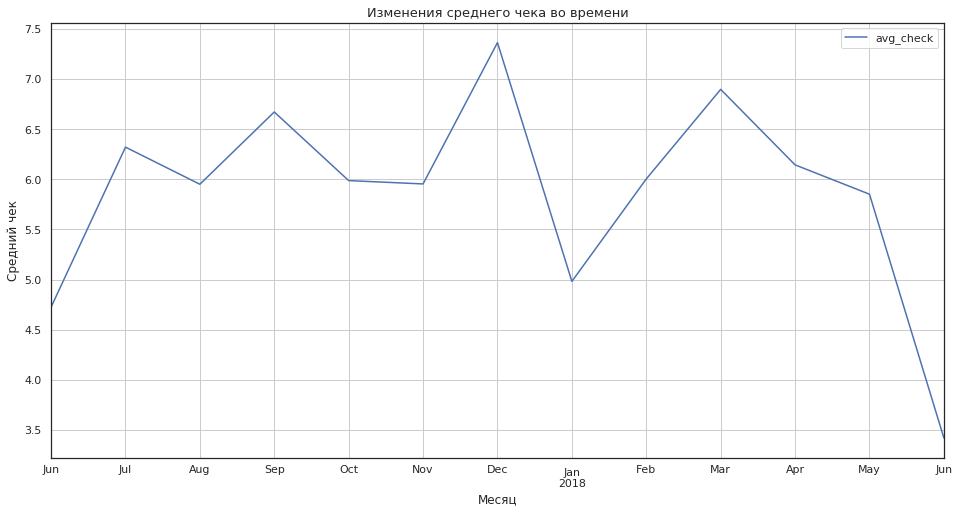

In [67]:
avg_check = orders_new.groupby('order_month').agg({'revenue':'sum', 'uid': 'nunique'})
avg_check['avg_check'] = avg_check['revenue'] / avg_check['uid']
avg_check['avg_check'].plot(figsize=(16, 8), legend=True)
plt.title('Изменения среднего чека во времени', fontsize=13)
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.grid(which='both')

In [68]:
avg_check['avg_check'].describe()

count    13.000000
mean      5.866514
std       1.014569
min       3.420000
25%       5.851010
50%       5.986674
75%       6.320297
max       7.363132
Name: avg_check, dtype: float64

In [69]:
orders['revenue'].mean()

4.999646930477041

Таким образом, средний средний чек примерно 5,9 у.е. на человека за год. Максимальных значений средний чек достиг в декабре 2017 года - 7,3 у.е. Крайние точки периода имеют минимальные значения в районе 4,75 в июне 2017 и 3,42 в июне 2018 года. В январе 2018 средний чек к максимального упал до 5 единиц, затем к марту снова вырос до 6,9 у.е.  

Следующий шаг - расчет "пожизненной" ценности клиента или LTV-метрики. Во внимание возьмем когорты, lifetime которых не менее 6 месяцев. 

Размеры когорт уже посчитаны выше.

In [70]:
cohorts_revenue = orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohorts_revenue.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [71]:
revenue = pd.merge(cohort_sizes, cohorts_revenue, on='first_order_month')
revenue.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Так как маржинальность у нас 100%, валовая прибыль составляет полный объем от выручки, ее считать не надо. Посчитаем куммулятивный LTV всех когорт и выделим срез тех, чей срок жизни составляет не менее полугода. 

In [72]:
revenue['age'] = (revenue['order_month'] - revenue['first_order_month']) / np.timedelta64(1, 'M')
revenue['age'] = revenue['age'].round().astype('int')
revenue['ltv'] = revenue['revenue'] / revenue['n_buyers']
revenue.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [73]:
output = revenue.pivot_table(index='first_order_month', 
                             columns='age', 
                             values='ltv', 
                             aggfunc='mean')
output = output.cumsum(axis=1).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [74]:
output.index = [str(x)[0:10] for x in output.index]

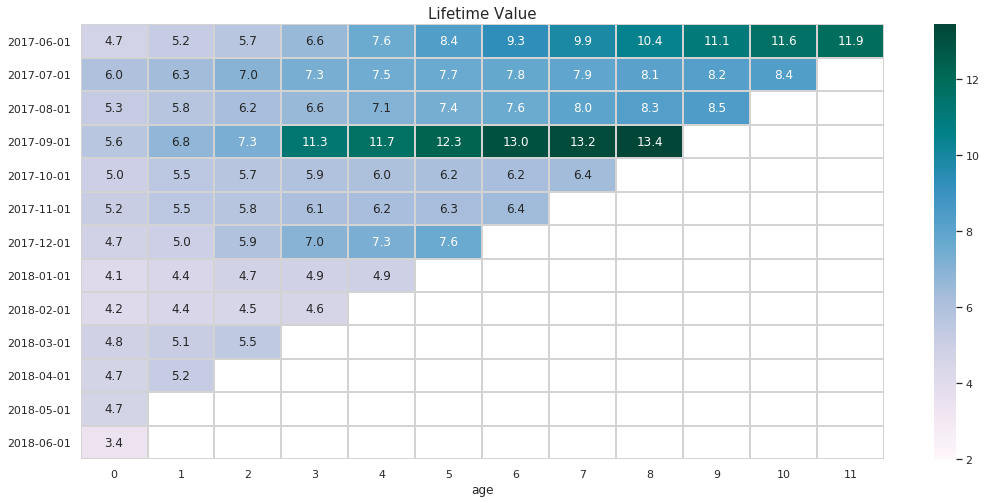

In [75]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('Lifetime Value', fontsize=15)
sns.heatmap(output, annot=True, linewidths=1, fmt='.1f', vmin=2, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

In [76]:
round(output[5].mean(), 2)

7.97

In [77]:
halfyear_cohorts = revenue[revenue['first_order_month'] <= '2017-12-01']

In [78]:
h_output = halfyear_cohorts.pivot_table(index='first_order_month', 
                             columns='age', 
                             values='ltv', 
                             aggfunc='mean')
h_output = h_output.cumsum(axis=1).round(2)
h_output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,,,,,,


In [79]:
h_cohorts_ltv_mean = h_output.mean(axis=1)
h_cohorts_ltv_mean

first_order_month
2017-06-01     8.530000
2017-07-01     7.474545
2017-08-01     7.064000
2017-09-01    10.512222
2017-10-01     5.870000
2017-11-01     5.920000
2017-12-01     6.265000
dtype: float64

In [80]:
h_output.mean(axis=0)

age
0      5.220000
1      5.737143
2      6.215714
3      7.250000
4      7.634286
5      7.970000
6      8.388333
7      9.082000
8     10.062500
9      9.250000
10    10.005000
11    11.880000
dtype: float64

In [81]:
m6_cum_ltv = h_output.mean(axis=0)[5].round(2)
m6_cum_ltv

7.97

В среднем, каждый пользователь когорт, существующих шесть и более месяцев потратили на сайте 7,97 у.е. за полгода. Когорты июня и сентября 2017 года имеет наиболее высокий средний ltv за все время существования - 8,5 и 10.5 у.е. Пожизненная ценность когорты растет с увеличением ее срока существования, значит, постоянные пользователи продолжают покупать на сайте. Так, кумулятивный ltv первой когорты за год - 11,9 у.е.  

***Вывод***

Среди покупателей есть пользователи, которые совершают покупку спустя несколько минут после первого посещения сайта, а есть те, кто впервые делает это спустя дни и месяцы после первого визита. Большинство заказов делается в промежутке от 4 минут до 2 дней. Медианное время - 7 минут, среднее - 3 часа 44 минуты. Максимальное время между первым посещением и заказом практически год - 363 дня.

Наиболее часто встречаемое значение - 1 минута. 

В среднем на пользователя приходится 1,43 заказа. В первый месяц жизни когорты каждый уникальный пользователь делает примерно по одному заказу, однако в последующем количество пользователей в когорте уменьшается, а число заказов на одного покупателя увеличивается.

Средний средний чек примерно 5,9 у.е. на человека за год. 

В среднем, каждый пользователь когорт, существующих шесть и более месяцев потратили на сайте 7,97 у.е. за полгода. 

Подтверждая предыдущий вывод, можно сказать, что помимо привлечения новых, необходимо подпитывать интерес постоянных пользователей. 

### Маркетинговые метрики 

Для расчета маркетинговых показателей нам необходимо:

- Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам;
- Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика;
- Рассчитать ROMI по когортам в разрезе источников. 

In [82]:
costs.head(1)

,source_id,dt,costs
0,1,2017-06-01,75.2


In [83]:
costs['costs'].sum()

329131.62

Общие маркетинговые расходы составили 329 тысячи у.е.

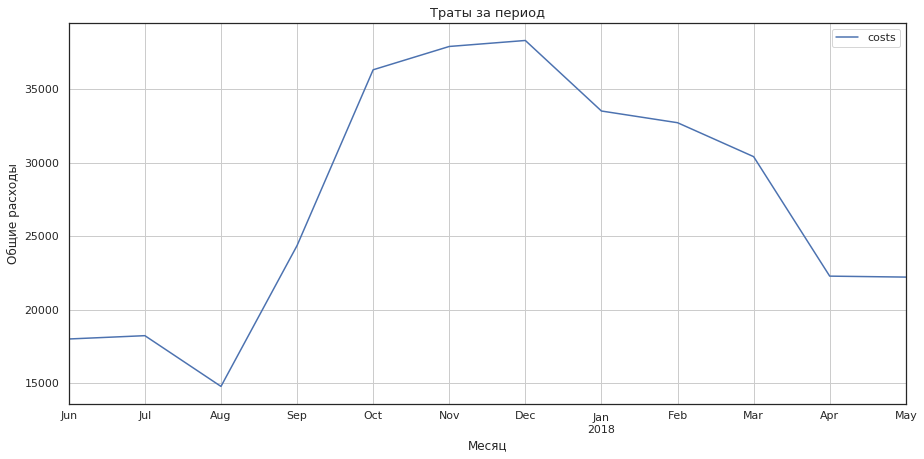

In [84]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
monthly_costs.plot(figsize=(15, 7))
plt.title('Траты за период', fontsize=13)
plt.xlabel('Месяц')
plt.ylabel('Общие расходы')
plt.grid(which='both')
plt.show()

Наибольшие траты на маркетинг наблюдались с октября по декабрь 2017 года. Тогда же было и максимальное количество уникальных пользователей и самый высокий средний чек. Посчитаем распределение трат по источникам. 

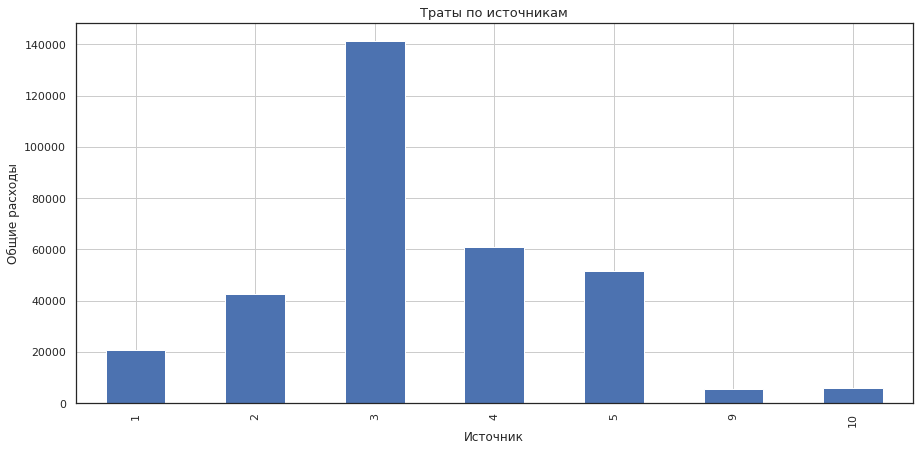

In [85]:
costs_per_source = costs.groupby('source_id')['costs'].sum()
costs_per_source.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Траты по источникам', fontsize=13)
plt.xlabel('Источник')
plt.ylabel('Общие расходы')
plt.show()

Наибольшие маркетинговые затраты идут на 3 источник - 140 тысяч у.е. Наименьшие - 1 (20 тысяч), 9 (4 тысячи) и 10 (4 тысячи). Посмотрим, как они менялись во времени. 

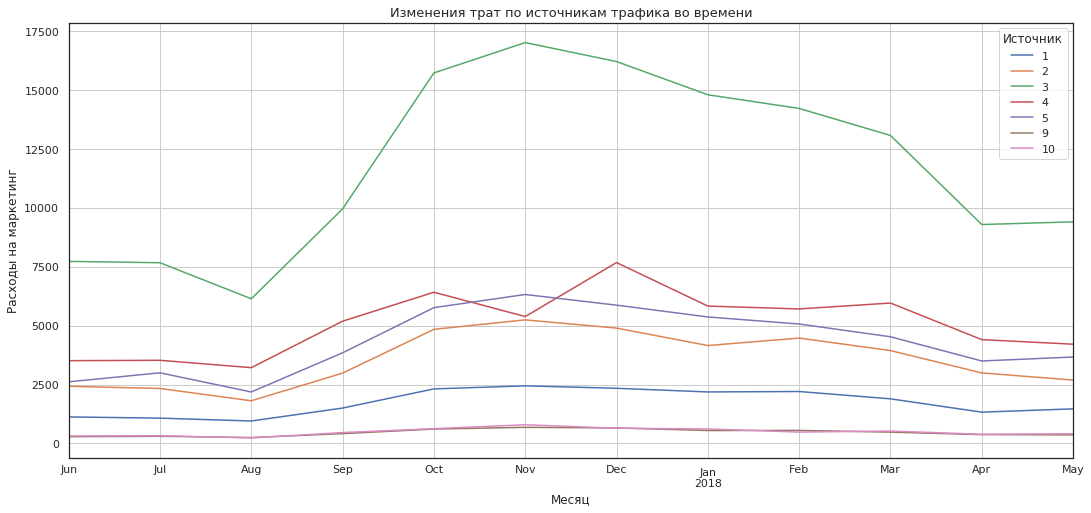

In [86]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(18, 8))
plt.grid(which='both')
plt.title('Изменения трат по источникам трафика во времени', fontsize=13)
plt.xlabel('Месяц')
plt.ylabel('Расходы на маркетинг')
plt.legend(title='Источник')
plt.show()

Маркетинговые расходы по 3 источнику сильно превышают остальные. С августа по ноябрь траты увеличились более чем на 11 тысяч у.е., затем расходы по источнику снизились. В целом, заметно, что расходы почти на все источники за исключением 4 (здесь наоборот упали, но возросли к декабрю почти на 2,5 тысячи) выросли к ноябрю 2017. 

Рассчитаем среднюю стоимость привлечения одного клиента. 

In [87]:
report = pd.merge(revenue, monthly_costs, left_on='first_order_month', right_on='month')
report['cac'] = report['costs'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


In [88]:
report['cac'].mean()

9.319905176921116

В среднем, за весь период стоимость одного клиента для маркетинга составляет 9,2 у.е. 

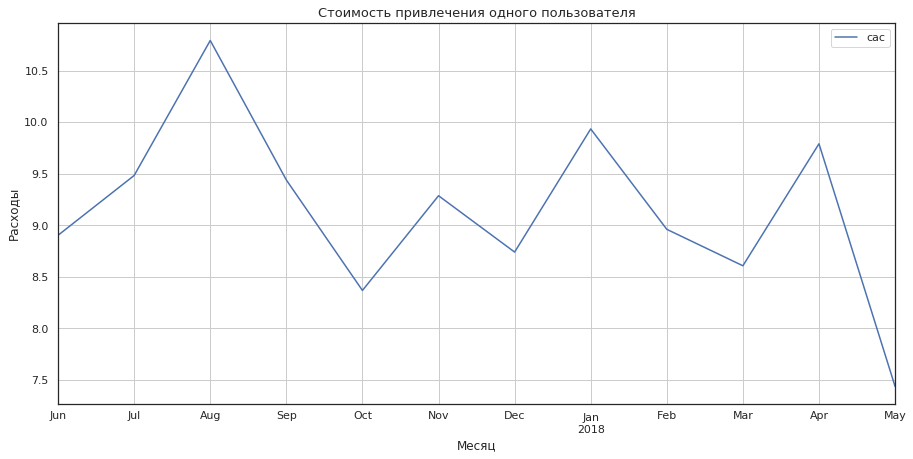

In [89]:
report.pivot_table(index='first_order_month', values='cac', aggfunc='mean').plot(figsize=(15, 7))
plt.title('Стоимость привлечения одного пользователя', fontsize=13)
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.grid(which='both')
plt.show()

Самый дорогой пользователь был в августе 2017 - 10,7 у.е. В октябре траты на привлечение одного человека снизились до 8,4 у.е., в то время как общие траты на маркетинг почти достигали пиковых значений. Несмотря на то, что пик расходов приходился на ноябрь-декабрь, средняя стоимость привлечения клиента в этот период 9,3 и 8,7 у.е. 

Теперь посчитаем средний CAC на покупателя для каждого источника трафика. Добавим в таблицу с заказами главный источник и заново проведем когортный анализ уже в разрезе источников.

In [90]:
sources = visits.sort_values('start_ts').groupby(['uid'])['source_id'].first()

In [91]:
orders_with_sources = orders.merge(sources, on='uid')
orders_with_sources.head()

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3


In [92]:
users_grouped_by_sources = orders_with_sources.groupby('source_id').agg({'uid':'nunique'})

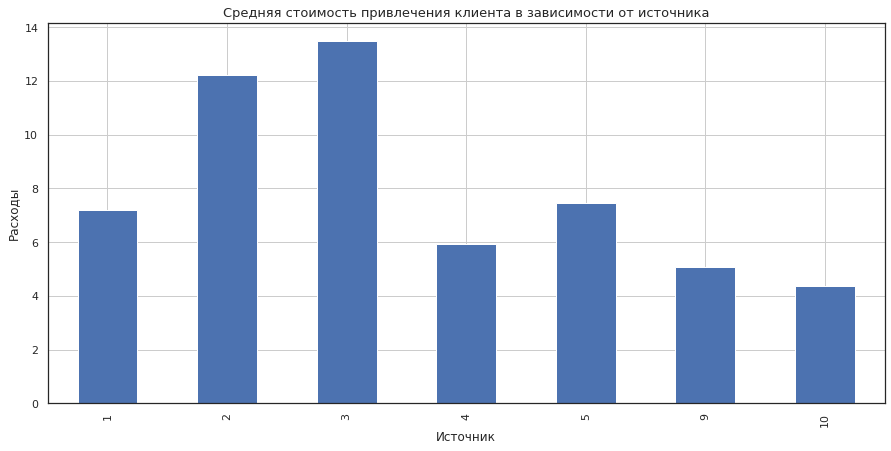

In [93]:
cac_by_sources = pd.merge(users_grouped_by_sources, costs_per_source, on='source_id')
cac_by_sources['cac'] = cac_by_sources['costs'] / cac_by_sources['uid']
cac_by_sources['cac'].plot(kind='bar', figsize=(15,7), grid=True)
plt.title('Средняя стоимость привлечения клиента в зависимости от источника', fontsize=13)
plt.ylabel('Расходы')
plt.xlabel('Источник')
plt.show()

Так, привлечение по 3 источнику является самым дорогим для Афиши - 13,5 у.е. на человека. CAC для второго источника 12,1 у.е. Примерно одинаково стоит один клиент, пришедший по 1 и 5 источнику - 7,3-7,5 у.е. Самые дешевые для компании - 9 и 10 источники - 5 и 4,2 у.е. на пользователя.

In [94]:
costs = costs.rename(columns={'month':'first_order_month'})
#для того, чтобы в дальнейшем соединить таблицы с сохранением двухуровневой индексации переименуем столбец

In [95]:
costs_by_date_and_sources = costs.groupby(['first_order_month', 'source_id']).agg({'costs':'sum'})
costs_by_date_and_sources.head()

costs
first_order_month source_id         
2017-06-01        1          1125.61
                  2          2427.38
                  3          7731.65
                  4          3514.80
                  5          2616.12

In [96]:
orders_with_sources = orders_with_sources.merge(first_order, on='uid')
orders_with_sources.head(1)

,buy_ts,revenue,uid,source_id,first_order_date
0,2017-06-01 00:10:00,17.0,10329302124590727494,1,2017-06-01 00:10:00


In [97]:
orders_with_sources['order_month'] = orders_with_sources['buy_ts'].astype('datetime64[M]')
orders_with_sources['first_order_month'] = orders_with_sources['first_order_date'].astype('datetime64[M]')

In [98]:
orders_with_sources['cohort_lifetime'] = orders_with_sources['order_month'] - orders_with_sources['first_order_month']
orders_with_sources['cohort_lifetime'] = orders_with_sources['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_with_sources['cohort_lifetime'] = orders_with_sources['cohort_lifetime'].round().astype('int')
orders_with_sources.head()

,buy_ts,revenue,uid,source_id,first_order_date,order_month,first_order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [99]:
users_revenue_by_date_and_sources = orders_with_sources.groupby(['first_order_month', 'source_id']).agg(
    {'uid':'nunique', 'revenue':'sum'})
users_revenue_by_date_and_sources.head()

uid  revenue
first_order_month source_id              
2017-06-01        1          190  6392.39
                  2          235  3915.26
                  3          638  3640.32
                  4          413  4992.67
                  5          384  4377.64

In [100]:
cac_by_date_and_sources = costs_by_date_and_sources.merge(users_revenue_by_date_and_sources, right_index=True, left_index=True)
cac_by_date_and_sources['cac'] = cac_by_date_and_sources['costs'] / cac_by_date_and_sources['uid']
cac_by_date_and_sources.head()

costs  uid  revenue        cac
first_order_month source_id                                  
2017-06-01        1          1125.61  190  6392.39   5.924263
                  2          2427.38  235  3915.26  10.329277
                  3          7731.65  638  3640.32  12.118574
                  4          3514.80  413  4992.67   8.510412
                  5          2616.12  384  4377.64   6.812813

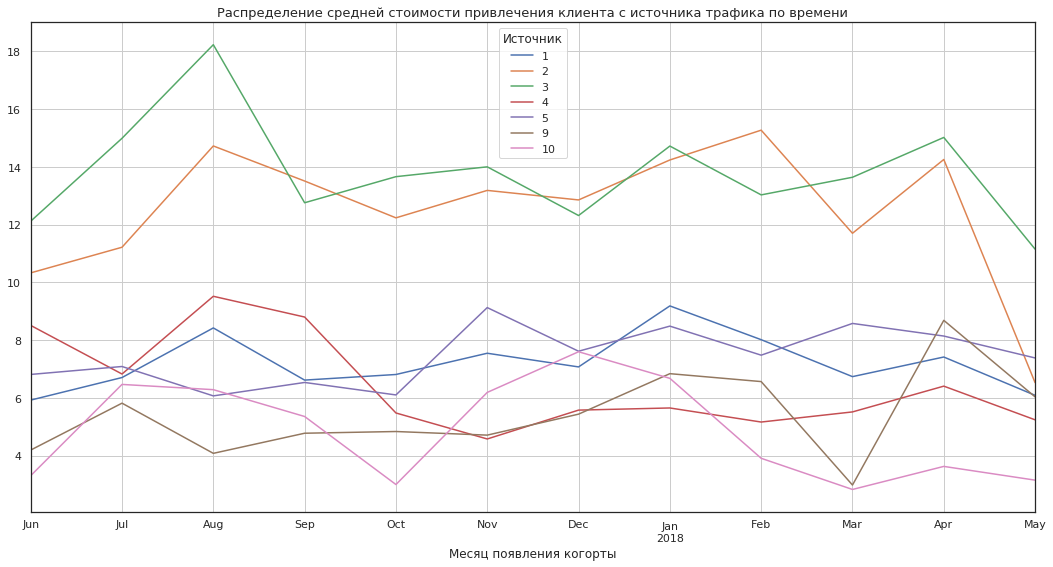

In [101]:
result_table = cac_by_date_and_sources.reset_index().pivot_table(index='first_order_month', columns='source_id', values='cac', aggfunc='mean')
result_table.plot(figsize=(18, 9))
plt.title('Распределение средней стоимости привлечения клиента с источника трафика по времени', fontsize=13)
plt.xlabel('Месяц появления когорты')
plt.legend(title='Источник')
plt.grid(which='both')

Цена привлечения клиента по 2 и 3 источникам превышает все остальные для каждой когорты, но особенно заметно увеличение CAC в августе 2017 года по 1, 2, 3 и 4 источникам. Расходы по последнему с тех пор упали в среднем до 4 единиц.

Траты по 1 и 5 источнику колеблются от 6 до 9 у.е. 

Расходы на клиента по 10 источнику увеличись к декабрю с 2 единиц до 7,5, затем к марту упали до минимальных значений 1,8. Стоимость одного клиента по 9 источнику в марте также была минимальной, но к апрелю выросла до 8,7 у.е. 

Последний этап - расчет ROMI по когортам в разрезе источников. Создадим новую таблицу по когортам и времени их жизни для каждого источника, посчитаем LTV каждой и добавим туда значения CAC.  

In [102]:
users_revenue_by_cohorts_and_sources = orders_with_sources.groupby(['first_order_month', 'source_id', 'cohort_lifetime']).agg(
    {'uid':'nunique', 'revenue':'sum'}).reset_index(level='cohort_lifetime')
users_revenue_by_cohorts_and_sources.columns = ['age', 'n_buyers', 'revenue_by_source']
users_revenue_by_cohorts_and_sources.head()

age  n_buyers  revenue_by_source
first_order_month source_id                                  
2017-06-01        1            0       190            1378.70
                  1            1        16             414.98
                  1            2        10             419.43
                  1            3         9             714.24
                  1            4        12             811.20

Теперь нам необходимо дополнить эту таблицу данными по CAC и посчитать LTV, учитывая количество пользователей в когорте. Нужно учитывать, что САС считаются по общему числу пользователей в когорте, поэтому объединим ее с уже готовыми выше расчетами по когортам и источникам.

In [103]:
payback_table = pd.merge(users_revenue_by_cohorts_and_sources, cac_by_date_and_sources, right_index=True, left_index=True)
payback_table.head()

age  n_buyers  revenue_by_source    costs  uid  \
first_order_month source_id                                                   
2017-06-01        1            0       190            1378.70  1125.61  190   
                  1            1        16             414.98  1125.61  190   
                  1            2        10             419.43  1125.61  190   
                  1            3         9             714.24  1125.61  190   
                  1            4        12             811.20  1125.61  190   

                             revenue       cac  
first_order_month source_id                     
2017-06-01        1          6392.39  5.924263  
                  1          6392.39  5.924263  
                  1          6392.39  5.924263  
                  1          6392.39  5.924263  
                  1          6392.39  5.924263

In [104]:
payback_table['ltv'] = payback_table['revenue_by_source'] / payback_table['uid']
payback_table['romi'] = payback_table['ltv'] / payback_table['cac']
payback_table = payback_table.reset_index()
payback_table.head()

,first_order_month,source_id,age,n_buyers,revenue_by_source,costs,uid,revenue,cac,ltv,romi
0,2017-06-01,1,0,190,1378.70,1125.61,190,6392.39,5.924263,7.256316,1.224847
1,2017-06-01,1,1,16,414.98,1125.61,190,6392.39,5.924263,2.184105,0.368671
2,2017-06-01,1,2,10,419.43,1125.61,190,6392.39,5.924263,2.207526,0.372625
3,2017-06-01,1,3,9,714.24,1125.61,190,6392.39,5.924263,3.759158,0.634536
4,2017-06-01,1,4,12,811.20,1125.61,190,6392.39,5.924263,4.269474,0.720676


Мы получили таблицу, в которой значения n_buyers соотвествуют числу покупателей в каждый месяц жизни когорты, соответственно, выручка revenue_by_source посчитана по этому количеству человек. Значения uid означают количество уникальных пользователей в когорте. Показатель ROMI каждой когорты посчитан исходя из LTV по n_buyers и единому для когорты и источнику CAC. 

In [105]:
sources = np.asarray(payback_table['source_id'].unique())
sources

array([ 1,  2,  3,  4,  5,  9, 10])

Сгруппируем данные по источнику и визуализируем каждую из получившихся сводных таблиц с помощью тепловой, посчитав кумулятивный ROMI.

In [106]:
tables=[]
for source in sources: 
    output_source = payback_table[payback_table['source_id'] == source].pivot_table(index='first_order_month', 
                                                                            columns='age', 
                                                                            values='romi', 
                                                                            aggfunc='mean')

    output_source = output_source.cumsum(axis=1).round(2)
    output_source.index = [str(x)[0:10] for x in output_source.index]
    tables.append(output_source)

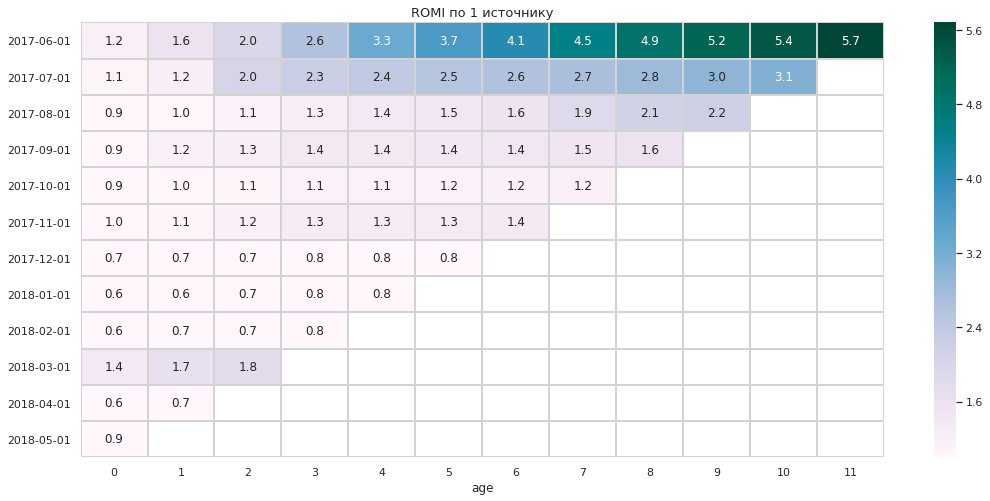

In [107]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 1 источнику', fontsize=13)
sns.heatmap(tables[0], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

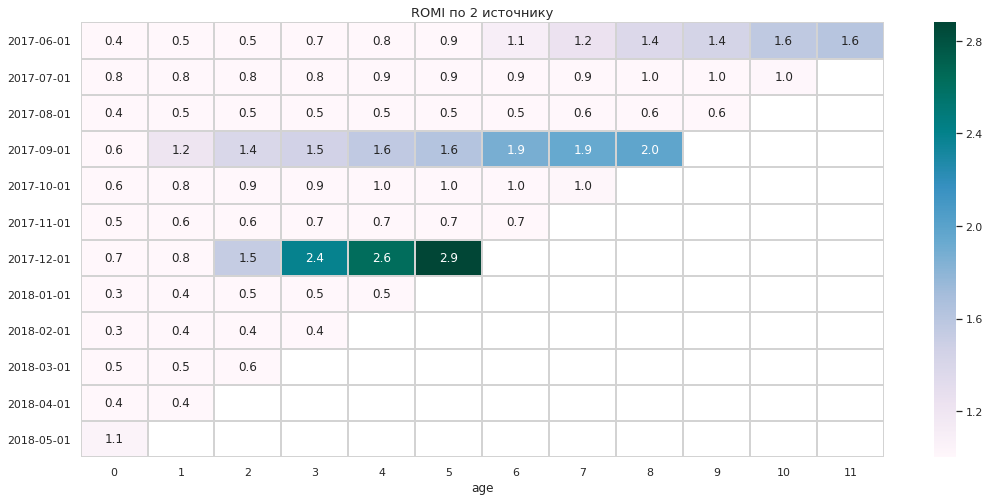

In [108]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 2 источнику', fontsize=13)
sns.heatmap(tables[1], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

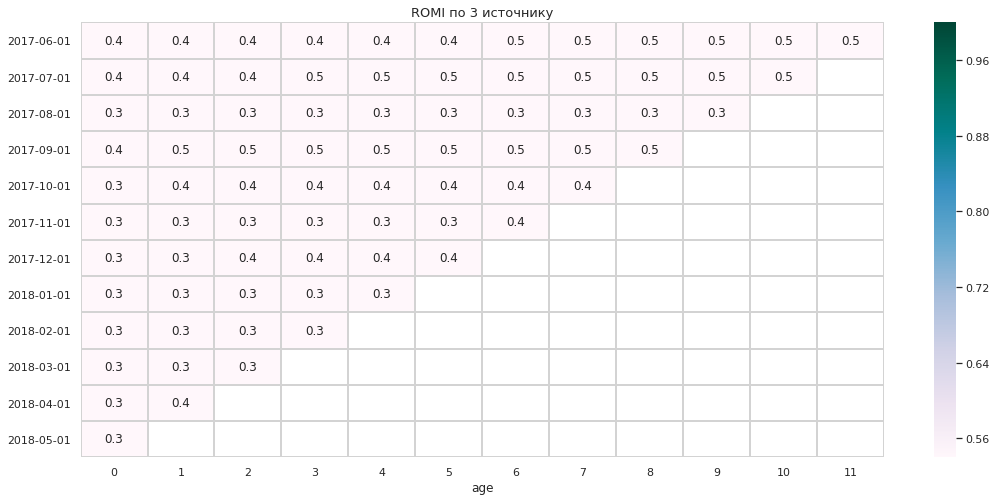

In [109]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 3 источнику', fontsize=13)
sns.heatmap(tables[2], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')

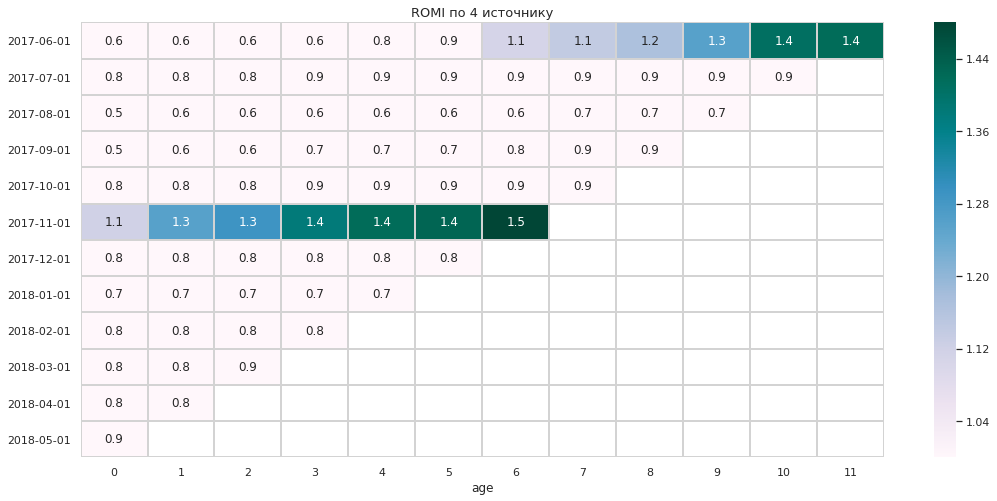

In [110]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 4 источнику', fontsize=13)
sns.heatmap(tables[3], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

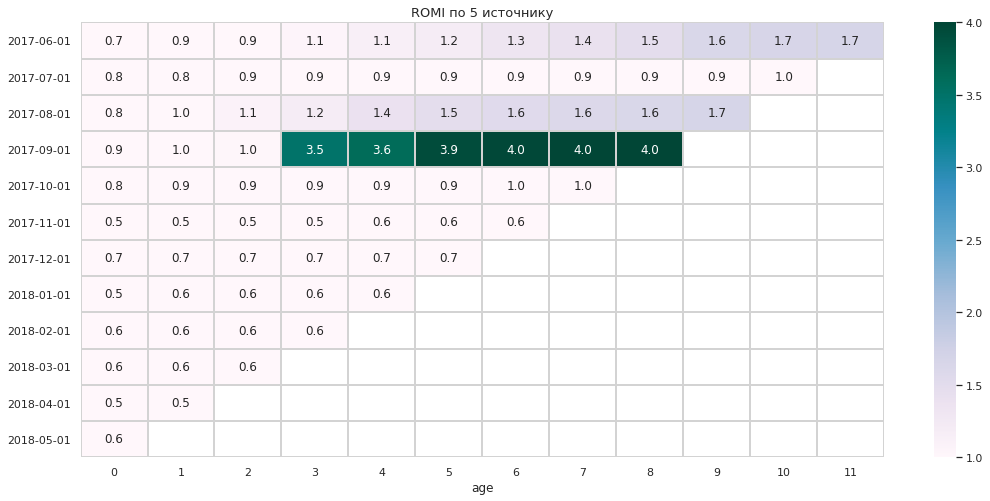

In [111]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 5 источнику', fontsize=13)
sns.heatmap(tables[4], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

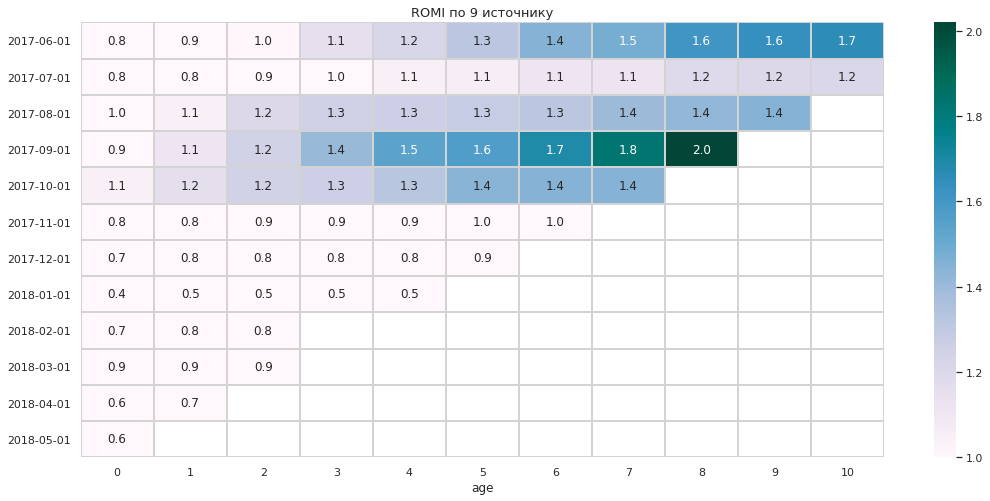

In [112]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 9 источнику', fontsize=13)
sns.heatmap(tables[5], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

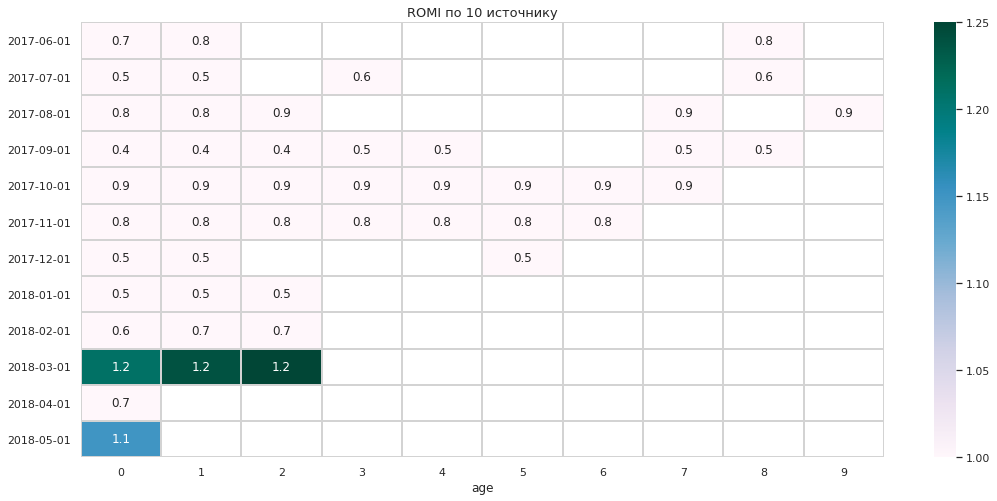

In [113]:
sns.set(style='white')
plt.figure(figsize=(18, 8))
plt.title('ROMI по 10 источнику', fontsize=13)
sns.heatmap(tables[6], annot=True, linewidths=1, fmt='.1f', vmin=1, cmap='PuBuGn', linecolor='lightgrey')
plt.show()

Для когорт июня, июля и ноября 2017 года и марта 2018 года, пользователи в которых пришли по 1 источнику окупаемость маркетинговых вложений начинается с первого месяца, причем для первой кумулятивный ROMI на 12 месяц достигает значений в 5,7 единиц. Остальные когорты, просуществовавшие более полугода (кроме декабрьской) выходят на окупаемость на второй месяц. Более молодые, за исключением мартовской, не выходят вовсе. 

Источник 2 более затратный. Из всех когорт периода на окупаемость вышли только те, что были образованы в июне (на седьмой месяц), сентябре (на второй месяц) и декабре (на третий месяц) 2017 года, а также когорта мая 2018 года на первый месяц жизни. Когорты июля и октября выходят в ноль на девятый и пятый месяц соответственно, но дальше коэффициент не растет. 

Самые высокие траты на 3 источник не окупаются вовсе. Ни одна из когорт не вышла на окупаемость за год. 

Расходы на 4 источник окупились только в двух когортах: июньская вышла на окупаемость на седьмой месяц, ноябрьская - на первый.

Вложения в 5 источник окупились в четырех когортах. Когорты августа и сентября вышли на окупаемость на второй месяц (у последней кумулятивный ROMI к 7 месяцу составляет 4 единицы), июня - на четвертый месяц и ноября - на 7 месяц. 

В силу того, что стоимость привлечения клиента практически самая низкая из всех, 5 когорт, пришедших по 9 источнику окупились: две из них уже на первый месяц - август и октябрь, на второй - сентябрь, на третий  - когорта июня, на четвертый - июля. Когорта ноября вышла в ноль на шестой месяц.

Расходы на 10 источник окупились только в когортах марта и мая 2018 года, когда CAC по источнику достиг минимальных значений. 

***Вывод***

Таким образом, сведем полученные значения. Общие маркетинговые расходы составили 329 тысяч у.е. Наибольшие траты на маркетинг наблюдались с октября по декабрь 2017 года. Тогда же было и максимальное количество уникальных пользователей и самый высокий средний чек. 

В среднем, за весь период стоимость одного клиента для маркетинга составляет 9,2 у.е. 

Наибольшие маркетинговые затраты идут на 3 источник - 140 тысяч у.е. Наименьшие - 1 (20 тысяч), 9 (4 тысячи) и 10 (4 тысячи). Привлечение по 3 источнику является самым дорогим для Афиши - 13,5 у.е. на человека. CAC для второго источника 12,1 у.е. Примерно одинаково стоит один клиент, пришедший по 1 и 5 источнику - 7,3-7,5 у.е. Самые дешевые для компании - 9 и 10 источники - 5 и 4,2 у.е. на пользователя. 

Можно выделить несколько источников, расходы на которые окупаются в достаточной мере. 
- 1: Окупаемость четырех когорт начинается с первого месяца, для одной из которых кумулятивный ROMI на 12 месяц достигает значений в 5,7 единиц. Остальные когорты, просуществовавшие более полугода (кроме декабрьской) выходят на окупаемость на второй месяц. 

- 2: Четыре когорты вышли на окупаемость на первый, второй, третий и седьмой месяцы. Две когорты вышли в ноль на девятый и пятый месяц, но дальше коэффициент не растет.

- 5: Вложения в источник окупились в четырех когортах. Две когорты вышли на окупаемость на второй месяц (у одной из них кумулятивный ROMI к 7 месяцу составляет 4 единицы), одна - на четвертый месяц и еще одна - на 7 месяц.

- 9: Пять когорт окупились: две из них уже на первый месяц, по одной на на второй, третий и четвертый. Еще одна когорта вышла в ноль на шестой месяц.



Источники, вложения в которые не окупились:

- 3: Ни одна из когорт не вышла на окупаемость за год.

- 4: Расходы окупились только в двух когортах.

- 10: На окупаемость вышли две когорты тогда, когда стоимость привлечения клиента достигла минимальных значений за весь период.


## Выводы и рекомендации

### Источник трафика

Стоит обратить внимание на 1 и 9 источники трафика. 

- 1: Общие расходы на источник за год составили 20 тысяч у.е. Стоимость привлечения клиента за весь период варьировалась от 6 до 9 у.е. Все когорты, срок жизни которых более полугода вышли на окупаемость с первого или второго месяца. Для одной из них кумулятивный ROMI на 12 месяц достигает значений в 5,7 единиц. Среди более "молодых" когорт одна также вышла на окупаемость с первого месяца. 

- 9: Общие расходы на источник - 4 тысячи у.е. в то время как значения САС в первые полгода были в промежутке от 4 до 6,8 у.е. на человека. Когорты, существовавшие в это время вышли на окупаемость за первые четыре месяца. То есть минимальные в срезе всех источников вложения показывают высокие коэффициенты ROMI. Вероятно, необходимо глубже изучить потребности аудитории, составляющей трафик с этого источника, чтобы правильно распределить ресурсы. 

Отдельно нужно отметить, что оценка окупаемости вложений в 5 источник показала, что ROMI когорты сентября 2017 года достигает 4 единиц. Эта же когорта имеет самые высокие показатели LTV, а также Retention Rate на второй и третий месяц. Необходимо оценить факторы, которые повлияли на ее привлечение, удержание и количество покупок. 

### Метрики 

**Продуктовые метрики**

- DAU, WAU, MAU: В среднем в день ресурсом пользовалось 907 человек, в неделю - 5716, в месяц - более 23 тысяч человек. В какие-то периоды ресурс более популярен, чем в другие: в конце осени 2017 - в начале зимы 2018 Яндекс.Афиша имела наиболее высокие цифры посещаемости в заданный временной промежуток.

- Количество визитов в день: Пользователи заходит на сайт Афиши 1 раз, единицы из них - больше. 24 и 28 ноября этот показатель увеличивался до 1,21 и 1,16 соответственно.

- ASL: 1 минута. 

- Retention Rate: В среднем, 6,5% посетителей возвращается на сайт на второй месяц пользования ресурсом. Со временем Retention Rate только падает в подавляющем числе когорт, за исключением когорт тех пользователей, что впервые воспользовались Афишей в июне, июле и августе 2017 года. Когорта сентября 2017 года показывает самые высокие значения RR из всех на второй и третий месяц использования - 8,5% и 6,9% соответственно. Кроме того, стоит отметить, что в когортах помладше Retention Rate на второй месяц ниже, чем у более ранних когорт.

**Метрики электронной коммерции**

- В среднем, пользователь совершает покупку спустя 1 минуту после первого посещения. 

- Количество заказов на пользователя: 1,43 заказа. В первый месяц жизни когорты каждый уникальный пользователь делает примерно по одному заказу, однако в последующем количество пользователей в когорте уменьшается, а число заказов на одного покупателя увеличивается.

- Средний чек: 5,9 у.е. на человека за год. 

- LTV: В среднем, каждый пользователь когорт, существующих шесть и более месяцев потратили на сайте 7,97 у.е. за полгода. Когорты июня и сентября 2017 года имеет наиболее высокий средний ltv за все время существования - 8,5 и 10.5 у.е. Пожизненная ценность когорты растет с увеличением ее срока существования, значит, постоянные пользователи продолжают покупать на сайте. Так, кумулятивный ltv первой когорты за год - 11,9 у.е.

**Маркетинговые метрики** 

- Общие маркетинговые расходы составили 329 тысяч у.е. Наибольшие траты на маркетинг наблюдались с октября по декабрь 2017 года. Тогда же было и максимальное количество уникальных пользователей и самый высокий средний чек. Наибольшие маркетинговые затраты идут на 3 источник - 140 тысяч у.е. Наименьшие - 1 (20 тысяч), 9 (4 тысячи) и 10 (4 тысячи). 

- САС: Средняя стоимость привлечения одного клиента для маркетинга составляет 9,2 у.е. Привлечение по 3 источнику является самым дорогим для Яндекс.Афиши - 13,5 у.е. на человека. Стоимость привлечения для второго источника 12,1 у.е. Примерно одинаково стоит один клиент, пришедший по 1 и 5 источнику - 7,3-7,5 у.е. Самые дешевые для компании - 9 и 10 источники - 5 и 4,2 у.е. на пользователя. 

Основная задача маркетологов, помимо привлечения новой аудитории, подкрепление сформированной пользовательской базы. Для частых посетителей культурных мероприятий Яндекс.Афиша должна стать основным средством просмотра афиши и покупки билетов. 

### Итоги когортного анализа

Совокупно особое внимание стоит уделить показателям когорт июня и сентября 2017 года. У них высокий коэффициент удержания сохраняется на второй месяц и более. Также именно это когорты показывают высокие индексы кумулятивного LTV и в разрезе разных источников сохраняют интенсивные данные по окупаемости. Так, например, окупаемость июньской когорты достигает значений 5,7 по первому источнику трафика, 1,7 по пятому и девятому. Когорта сентября показывает ROMI 4,0 по пятому источнику и 2,0 по второму и девятому.  